In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch

In [3]:
from pygsp import graphs, plotting

# Load and Visualize Data

In [4]:
W = np.load('../node2coords/data/soc-karate/karate_adjacency.npy')

In [5]:
labels = np.genfromtxt("../node2coords/data/soc-karate/soc-karate.node_labels")

In [6]:
my_G = graphs.Graph(W, gtype='community')

In [7]:
my_G.info = {}

In [8]:
my_G.info['node_com'] = labels[:,1].astype(int)

In [9]:
my_G.set_coordinates(kind ='community2D', seed=42)

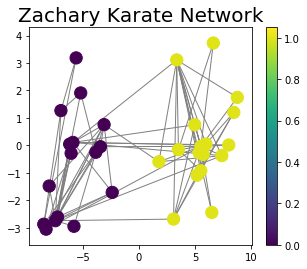

In [10]:
fig, axes = plt.subplots(1, 1, figsize=(5, 4));
my_G.plot_signal(labels[:,1], vertex_size=150, ax=axes);
axes.set_title('Zachary Karate Network', fontsize=20);

# Load and Visualize Representations Learned by node2coords

In [11]:
path = '../node2coords/power1diff1_tau1_data_karate_eps0.03_sinkh500_dim2_epochs2000_batch34_rho0.05/'

## 1. Graph Structural Patterns

In [13]:
MS = torch.load(path+'encoder/latent_rep/latent_representation_epoch1999.pt', map_location='cpu')

In [14]:
M_S = MS.detach().cpu().numpy()

Text(0.5,1,'Second Graph Structural Pattern')

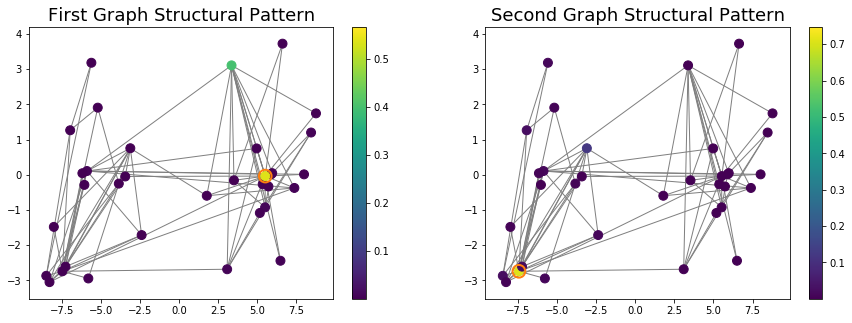

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5));
my_G.plot_signal(M_S[:,0], ax=axes[0], vertex_size=80, highlight=np.argmax(M_S[:,0]));
axes[0].set_title('First Graph Structural Pattern', fontsize=18);
my_G.plot_signal(M_S[:,1], ax=axes[1], vertex_size=80, highlight=np.argmax(M_S[:,1]));
axes[1].set_title('Second Graph Structural Pattern', fontsize=18);

## 2. Node Coordinates

In [16]:
lamdas = torch.load(path+'weights/lamdas_it0_epoch1999.pt')

In [17]:
my_lamdas = lamdas.detach().cpu().numpy()

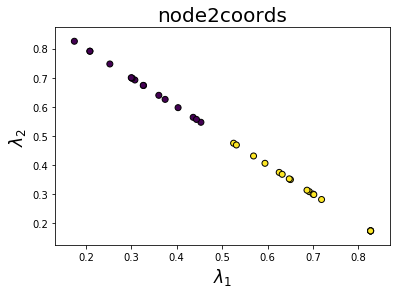

In [20]:
fig, axs = plt.subplots(1, 1)
axs.scatter(my_lamdas[:,0], my_lamdas[:,1], c=labels[:,1], edgecolors='k');
axs.set_xlabel('$\lambda_1$', fontsize=17);
axs.set_ylabel('$\lambda_2$', fontsize=17);
axs.set_title('node2coords',fontsize=20);

# Check Convergence

In [21]:
objective = np.load(path+'convergence.npy')

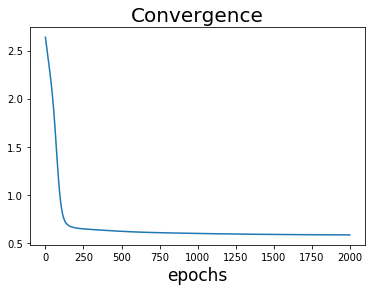

In [22]:
fig, axs = plt.subplots(1, 1)
axs.plot(objective);
axs.set_xlabel('epochs', fontsize=17);
axs.set_ylabel('', fontsize=17);
axs.set_title('Convergence',fontsize=20);